# Case Study Project - Coffee Shops

**Company Background**

Caffeine Form is a company creating coffee cups from recycled material. Although they started selling the products on their website last year, the results were not as good as they expected. To better enter the market, they decided to collaborate with local coffee shops to advertise and sell their coffee cups.

The marketing team is trying to come up with the best criteria to choose possible collaborators by investigating the local market. They think focusing on the places with the most reviews might have the biggest impact as more good reviews will create more excitement for their cups.

**Customer Questions**

They would like you to answer the following questions to help:

- What is the most common place type in this local market?
- How does the range in number of reviews differ across all shops?
- How does the number of reviews vary across each place type?

The dataset needs to be validated based on the description below:

|Column Name    |Criteria                                                                                      |
|:--------------|:---------------------------------------------------------------------------------------------|
|Region         |Character, one of 10 possible regions (A to J) where coffee shop is located.                  |
|Place name     |Character, name of the shop.                                                                  |
|Place type     |Character, the type of coffee shop, one of “Coffee shop”, “Cafe”,“Espresso bar”, and “Others”.|
|Rating         |Numeric, coffee shop rating (on a 5 point scale).                                             |
|Reviews        |Numeric, number of reviews provided for the shop. Remove the rows if the number of reviews is missing.|
|Price          |Character, price category, one $, two or three.                                               |
|Delivery option|Binary, describing whether there is a delivery option, either True or False.                  |
|Dine in option |Binary, describing whether there is a dine-in option, either True or False. Replace missing values with False.|
|Takeout option |Binary, describing whether there is a takeout option, either True or False. Replace missing values with False.|

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#First inspection of the data
df = pd.read_csv("coffee.csv")
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [3]:
# Total of records and columns, respectively
df.shape

(200, 9)

# Data Validation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [5]:
#Ensuring the all ten possible regions (A to J)
df.Region.value_counts().sort_index()

A    20
B    20
C    20
D    20
E    20
F    20
G    20
H    20
I    20
J    20
Name: Region, dtype: int64

In [6]:
print(f"There are {len(df['Place name'])} Places but {len(df['Place name'].unique())} quantity of unique Places")

There are 200 Places but 187 quantity of unique Places


In [7]:
# Finding duplicates 
duplicated = list(set(list(df[df['Place name'].duplicated()]['Place name'])))
df_duplicated = df[df['Place name'].isin(duplicated)].sort_values(by=['Place name'])
df_duplicated

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
23,J,Coffee House,Cafe,4.7,329.0,$$,False,NaN,True
68,B,Coffee House,Others,4.7,132.0,$$,False,NaN,NaN
161,I,Coffee House,Espresso bar,4.5,268.0,$$,False,NaN,NaN
172,I,Dim Kavy,Others,4.7,222.0,$$,False,True,True
171,I,Dim Kavy,Espresso bar,4.7,185.0,$$,False,NaN,NaN
181,H,Dim Kavy,Others,4.9,39.0,$$,False,NaN,NaN
66,B,Dim Kavy,Espresso bar,4.8,118.0,$$,False,NaN,NaN
151,G,Kaffa,Cafe,4.7,1281.0,$$,False,True,True
154,G,Kaffa,Espresso bar,4.8,824.0,$$,False,True,True
100,E,Lviv Coffee Manufacture,Coffee shop,4.7,17937.0,$$,True,True,True


Some of these duplicated records seems to be duplicated by its Place name, nevertheless even they have same Place name they have different Regions and different Place type , so we consider them as different locations with their own Reviews and customer experiences. Just a few of them will be removed, based on same regions, same place type and if they have a lot of Reviews (thought as outliers)

In [8]:
# Droping duplicated records with same region, same place type and high number of reviews (outliers)
df = df.drop(index=[181,100,132,101])
df.shape

(196, 9)

In [9]:
#Ensuring consistency at Dine in option & Takeout option columns
df['Dine in option'] = df['Dine in option'].fillna(value=False)
df['Takeout option'] = df['Takeout option'].fillna(value=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           196 non-null    object 
 1   Place name       196 non-null    object 
 2   Place type       196 non-null    object 
 3   Rating           194 non-null    float64
 4   Reviews          194 non-null    float64
 5   Price            196 non-null    object 
 6   Delivery option  196 non-null    bool   
 7   Dine in option   196 non-null    bool   
 8   Takeout option   196 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 11.3+ KB


In [10]:
#Removing rows with null values at Reviews Series
df = df.dropna(axis=0, subset=['Reviews'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           194 non-null    object 
 1   Place name       194 non-null    object 
 2   Place type       194 non-null    object 
 3   Rating           194 non-null    float64
 4   Reviews          194 non-null    float64
 5   Price            194 non-null    object 
 6   Delivery option  194 non-null    bool   
 7   Dine in option   194 non-null    bool   
 8   Takeout option   194 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 11.2+ KB


Once data are cleansed, their consistency is checked

In [11]:
#Confirming the four types of coffee shop
df['Place type'].value_counts()

Coffee shop     94
Cafe            56
Others          24
Espresso bar    20
Name: Place type, dtype: int64

In [12]:
# Range of Rating between 3.9 and 5.0
df['Rating'].describe()

count    194.000000
mean       4.662887
std        0.223175
min        3.900000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: Rating, dtype: float64

In [13]:
#Ensuring consistency at Price column
df['Price'].value_counts()

$$     188
$$$      4
$        2
Name: Price, dtype: int64

When we make sure that the Data Validation has ended it's time to go through Data Analysis trying to find answers to business questions

# Data Discovering and Visualization

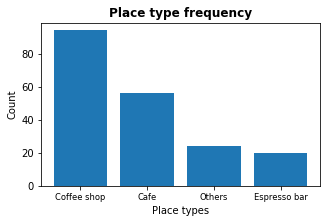

In [14]:
# What is the most common place type in this local market?

#To find the most common place type, a good way is using bar plots based on the count of each type of places

df_most_common_place_type = pd.Series(dict(df['Place type'].value_counts().sort_values(ascending=False)))
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.bar(range(len(df_most_common_place_type)), df_most_common_place_type.values, align='center')
plt.xticks(range(len(df_most_common_place_type)), df_most_common_place_type.index.values, size='small')
plt.title("Place type frequency", fontweight='bold')
plt.xlabel('Place types')
plt.ylabel('Count')
plt.show()

As the histogram shows, the Coffee Shop type is the most commonplace. Then the Marketing Team must aim their efforts to sell to Coffee Shop type.

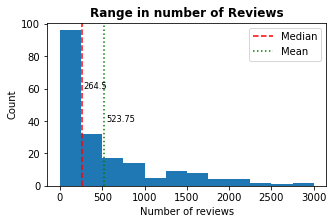

In [15]:
# How the range, in number of reviews, differ across all shops (general)?

# Now the effort focuses on finding the distribution of reviews of the entire dataset for all shops,
# I use histogram

num_reviews = list(df['Reviews'])
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
# Freedman-Diaconis rule to find number of bins
q1 = np.quantile(num_reviews, 0.25)
q3 = np.quantile(num_reviews, 0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(num_reviews) ** (1 / 3))
bin_count = int(np.ceil((max(num_reviews) - min(num_reviews)) / bin_width))
plt.hist(num_reviews, bins=bin_count, range=(0,3000))
plt.axvline(x=np.quantile(num_reviews,0.5), color= 'red', linestyle='--', label='Median')
plt.text(280,60,np.quantile(num_reviews,0.5), fontsize='small')
plt.axvline(x=np.mean(num_reviews), color= 'green', linestyle=':', label='Mean')
plt.text(550,40,round(np.mean(num_reviews),2), fontsize='small')
plt.title("Range in number of Reviews", fontweight='bold')
plt.xlabel('Number of reviews')
plt.ylabel('Count')
plt.legend()
plt.show()

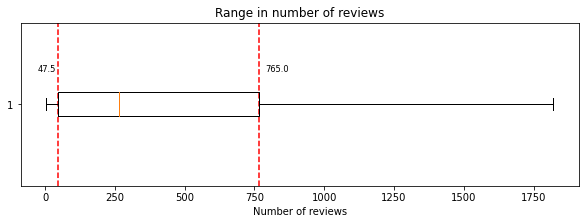

In [16]:
# Inter Quantile Range in general number of reviews 

num_reviews = list(df['Reviews'])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
plt.axvline(x=np.quantile(num_reviews,0.25), color= 'red', linestyle='--')
plt.text(-25,1.2,np.quantile(num_reviews,0.25), fontsize='small')
plt.axvline(x=np.quantile(num_reviews,0.75), color= 'red', linestyle='--')
plt.text(790,1.2,np.quantile(num_reviews,0.75), fontsize='small')
plt.boxplot(num_reviews, sym='', vert=False)
plt.title('Range in number of reviews')
plt.xlabel('Number of reviews')
plt.show()

As plots show, a few local coffee shops with almost 3000 reviews were found, these are considered outliers and were excluded.

The Inter Quantile Range of Reviews is between 50 and 750 approx., then the Marketing Team should aim for Coffee Shops that have this number of Reviews.

In [17]:
# How does the number of reviews vary across each place type?

# Now it's time for inspecting the number of reviews could be different between each place type

# I built a list of all Place type, removing white space to avoid some upcoming error

# Next, I create four lists with reviews of every single Place type, each list has its variable name 
# which identifies where reviews belong


df['Place type'] = df['Place type'].replace(' ','_', regex=True)
place_types = list(df['Place type'].value_counts().index)
# Creating four variables with reviews for each type of place
for i in place_types:
	globals()['df_' + i] = list(df[df['Place type'] == i]['Reviews'])

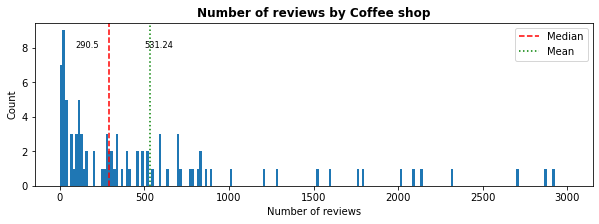

In [18]:
# Distribution of Coffee Shop's reviews using histogram

# Adjusting plot size
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
# Creating histogram
plt.hist(df_Coffee_shop, bins=200, range=(0,3000))
# Adding a trend line of the Median
plt.axvline(x=np.quantile(df_Coffee_shop,0.5), color= 'red', linestyle='--', label='Median')
plt.text(90,8,np.quantile(df_Coffee_shop,0.5), fontsize='small')
# Adding a trend line of the Mean
plt.axvline(x=np.mean(df_Coffee_shop), color= 'green', linestyle=':', label='Mean')
plt.text(500,8,round(np.mean(df_Coffee_shop),2), fontsize='small')
# Setting titles and labels
plt.title("Number of reviews by Coffee shop", fontweight='bold')
plt.xlabel('Number of reviews')
plt.ylabel('Count')
plt.legend()
# Showing plot
plt.show()

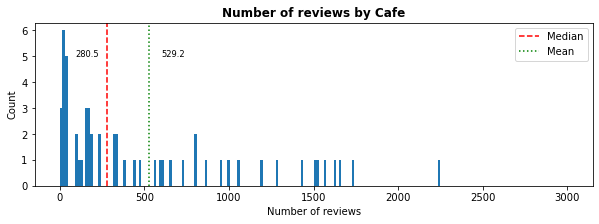

In [19]:
# Distribution of Cafe's reviews using histogram

# Adjusting plot size
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
# Creating histogram
plt.hist(df_Cafe, bins=200, range=(0,3000))
# Adding a trend line of the Median
plt.axvline(x=np.quantile(df_Cafe,0.5), color= 'red', linestyle='--', label='Median')
plt.text(90,5,np.quantile(df_Cafe,0.5), fontsize='small')
# Adding a trend line of the Mean
plt.axvline(x=np.mean(df_Cafe), color= 'green', linestyle=':', label='Mean')
plt.text(600,5,round(np.mean(df_Cafe),2), fontsize='small')
# Setting titles and labels
plt.title("Number of reviews by Cafe", fontweight='bold')
plt.xlabel('Number of reviews')
plt.ylabel('Count')
plt.legend()
# Showing plot
plt.show()

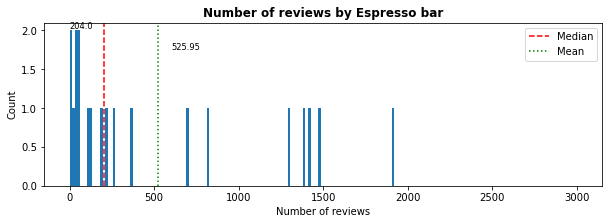

In [20]:
# Distribution of Espresso bar's reviews using histogram

# Adjusting plot size
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
# Creating histogram
plt.hist(df_Espresso_bar, bins=200, range=(0,3000))
# Adding a trend line of the Median
plt.axvline(x=np.quantile(df_Espresso_bar,0.5), color= 'red', linestyle='--', label='Median')
plt.text(0,2.03,np.quantile(df_Espresso_bar,0.5), fontsize='small')
# Adding a trend line of the Mean
plt.axvline(x=np.mean(df_Espresso_bar), color= 'green', linestyle=':', label='Mean')
plt.text(600,1.75,round(np.mean(df_Espresso_bar),2), fontsize='small')
# Setting titles and labels
plt.title("Number of reviews by Espresso bar", fontweight='bold')
plt.xlabel('Number of reviews')
plt.ylabel('Count')
plt.legend()
# Showing plot
plt.show()

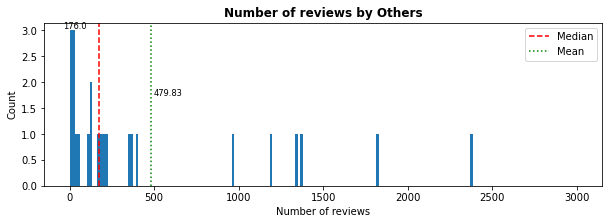

In [21]:
# Distribution of Espresso bar's reviews using histogram

# Adjusting plot size
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
# Creating histogram
plt.hist(df_Others, bins=200, range=(0,3000))
# Adding a trend line of the Median
plt.axvline(x=np.quantile(df_Others,0.5), color= 'red', linestyle='--', label='Median')
plt.text(-40,3.03,np.quantile(df_Others,0.5), fontsize='small')
# Adding a trend line of the Mean
plt.axvline(x=np.mean(df_Others), color= 'green', linestyle=':', label='Mean')
plt.text(500,1.75,round(np.mean(df_Others),2), fontsize='small')
# Setting titles and labels
plt.title("Number of reviews by Others", fontweight='bold')
plt.xlabel('Number of reviews')
plt.ylabel('Count')
plt.legend()
# Showing plot
plt.show()

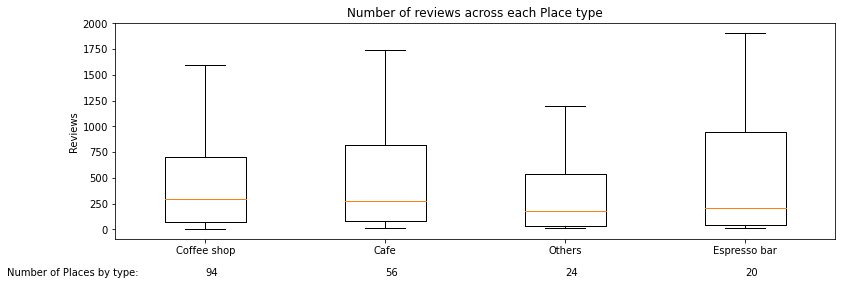

In [22]:
# boxplot of the Reviews from each Place type

num_place_types= list(dict(df['Place type'].value_counts()).values())
fig = plt.figure(figsize =(10, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data = [df_Coffee_shop, df_Cafe, df_Others, df_Espresso_bar] 
# Creating plot
bp = ax.boxplot(data, sym='')
ax.set_xticklabels(['Coffee shop', 'Cafe', 'Others', 'Espresso bar'])
ax.set_title('Number of reviews across each Place type')
ax.set_ylabel('Reviews')
ax.text(-0.1,-450, "Number of Places by type: ")
for i,j in enumerate(num_place_types,1):
    ax.text(i, -450, j)

# showing plot
plt.show()

Even though Coffee Shop has a higher mean of reviews between place types, the Coffee Shop Inter Quantile Range is smaller than the Cafe IQR and the IQR of Espresso bar. Maybe because the number of Coffee Shops within the dataset is almost double than the number of Cafes and almost five times the number of Espresso bars. So the recommendation is to focus, also, focus on those Cafe and Espresso bar places with above 500 reviews, not only Coffee Shops with between 50 and 790 reviews.

## Recomendations

If the main idea of Marketing Team is to reach more customers, then they should focus on:

- Coffe Shops around 500 reviews
- Consider also Cafes and Espresso bars, also above 500 reviews